# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Shulhan
- **Email:** m002b4ky3089@bangkit.academy
- **ID Dicoding:** muhammad_shulhan

## Menentukan Pertanyaan Bisnis

Dataset yang digunakan adalah dataset Air Quality Dataset yang mengandung sejumlah dataset yang memiliki beberapa atribut kualitas udara di wilayah tertentu. Adapun pertanyaan bisnis yang akan dianalisis dalam proyek ini adalah sebagai berikut:

- Bagaimana hubungan antara tingkat polusi udara dan kondisi cuaca?

    Penjelasan : Dataset mengandung sejumlah atribut yang merepresentasikan kondisi cuaca (TEMP, PRES, dsb) dan tingkat polusi (PM2.5 dan PM10). Atribut-atribut ini akan dianalisis lebih lanjut apakah mereka saling berhubungan atau tidak.
- Apakah ada tren peningkatan atau penurunan kualitas udara yang signifikan selama musim tertentu?

    Penjelasan : Dari nama dataset yang diberikan, kita bisa asumsikan bahwa dataset tersebut merupakan data kualitas udara yang diambil dari beberapa kota di negara cina. Mengingat cina merupakan negara dengan 4 musim, akan dicoba analisis bagaimana nilai kualitas udara (PM2.5 dan PM10) dalam setiap musim tersebut.

## Import Semua Packages/Library yang Digunakan

In [84]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Data Wrangling

### Gathering Data

Data yang digunakan merupakan 12 dataset yang diperoleh dari bagian penjelasan tugas proyek ini.

In [53]:
## Membaca setiap dataset dengan menggunakan pandas

Aotizhongxin = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Changping = pd.read_csv("data/PRSA_Data_Changping_20130301-20170228.csv")
Dingling = pd.read_csv("data/PRSA_Data_Dingling_20130301-20170228.csv")
Dongsi = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
Guanyuan = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv")
Gucheng = pd.read_csv("data/PRSA_Data_Gucheng_20130301-20170228.csv")
Huairou = pd.read_csv("data/PRSA_Data_Huairou_20130301-20170228.csv")
Nongzhanguan = pd.read_csv("data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
Shunyi = pd.read_csv("data/PRSA_Data_Shunyi_20130301-20170228.csv")
Tiantan = pd.read_csv("data/PRSA_Data_Tiantan_20130301-20170228.csv")
Wanliu = pd.read_csv("data/PRSA_Data_Wanliu_20130301-20170228.csv")
Wanshouxigong = pd.read_csv("data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

Perhatikan bahwa setiap database tersebut merupakan data kualiatas udara, dengan periode yang sama dan kota yang berbeda. Disini besar kemungkinannya dataset-dataset tersebut memiliki kolom-kolom yang sama. Akan dicoba melakukan pengecekan setiap kolom dari dataset tersebut apakah memiliki kolom yang sama. Apabila sama, dataset tesebut akan digabungkan sehingga setiap proses Data Wrangling tidak perlu dilakukan untuk setiap dataset, namun cukup 1 kali iterasi saja.

In [54]:
# Menyimpan nama dataset dalam array
datasets = [Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong]

# Melakukan perbandingan apakah setiap kolom sama
columns_match = all([set(df.columns) == set(Aotizhongxin.columns) for df in datasets])

if columns_match:
    print("All datasets have the same columns.")
else:
    print("Columns are different between datasets.")
    
    # Apabila berbeda, dilakukan pengecekan bagian kolom di dataset mana yang berbeda.
    for i, df in enumerate(datasets):
        if set(df.columns) != set(Aotizhongxin.columns):
            print(f"Dataset {i} has different columns:")
            print(df.columns)

All datasets have the same columns.


In [55]:
main_data_df = pd.concat(datasets, ignore_index=True)

print("Datasets merged successfully!")

Datasets merged successfully!


Ternyata setiap kolom dalam dataset sama, sehingga setiap data tersebut digabungkan menjadi main_data_df. Selanjutnya akan coba dilihat 5 row pertama dalam dataset tersebut.

In [52]:
main_data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Atribut yang terdapat pada setiap kolom dalam 12 dataset tersebut sama, sehingga dapat digabungkan menjadi 1 dataset besar untuk mempermudah proses analisis.
- Dataset tersebut mengandung berbagai data yang berkaitan dengan kualitas udara, seperti waktu, tingkat polusi, dan kondisi cuaca.

### Assessing Data

In [56]:
main_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


Dapat dilihat bahwa jumlah non null untuk beberapa atribut berbeda dengan atribut yang lain. Selain itu, dapat dikonfirmasi pula tidak adanya kesalahan atribut dalam setiap kolom pada dataset tersebut. Selanjutnya akan dilakukan pengecekan atribut apa yang memiliki missing value.

In [57]:
main_data_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Setelah diperiksa, ternyata lebih dari setengah kolom yang ada memiliki missing value dengan jumlah terbanyak 20701 pada atribut CO.

In [58]:
print("Jumlah duplikasi: ", main_data_df.duplicated().sum())

Jumlah duplikasi:  0


Dapat dilihat tidak terdapat duplikasi pada dataset.

In [59]:
main_data_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Dari tabel di atas, saya menemukan keanehan pada nilai PM2.5 dan PM10. Nilai maksimum dan rata-rata PM2.5 dan PM10 yang diberikan cukup tinggi ketika dibandingkan dengan data WHO(referensi : https://www.who.int/publications/i/item/9789240034228) dan EPA(referensi : https://www.epa.gov/pm-pollution/national-ambient-air-quality-standards-naaqs-pm). Hal ini mengindikasikan kemungkinan adanya kesalahan pengukuran atau outlier yang cukup ekstrim.

Untuk itu, akan coba dicari outlier PM dan juga atribut lain(untuk menutup kemungkinan adanya keanehan pada atribut lain juga.)


In [60]:
def identify_outliers(df):
    outlier_indices = {}
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Hitung batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Temukan indeks outlier
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_indices[column] = outliers.index.tolist()
        
    return outlier_indices

# Menentukan outlier untuk setiap atribut
outliers = identify_outliers(main_data_df)

# Menampilkan hasil
for column, indices in outliers.items():
    print(f"Outliers in {column}: {indices}")

Outliers in No: []
Outliers in year: []
Outliers in month: []
Outliers in day: []
Outliers in hour: []
Outliers in PM2.5: [120, 121, 136, 140, 141, 142, 143, 144, 149, 150, 151, 152, 153, 156, 157, 158, 159, 160, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 183, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 1286, 1288, 1289, 1521, 1559, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1835, 1836, 2244, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2913, 2914, 2915, 2924, 2925, 2926, 2927, 2928, 3924, 3925, 3926, 5060, 5061, 5062, 5063, 5073, 5074, 5075, 5076, 5077, 5078, 5083, 5084, 5085, 5086, 5087, 5088, 5089, 5090, 5091, 5092, 5093, 5094, 5229, 5230, 5231, 5232, 5233, 5234, 5

Seperti yang diprediksi, ternyata terdapat banyak outlier pada PM2.5 dan PM10. Selain itu, terdapat pula outlier pada beberapa atribut yang lain.

Insight penting yang didapatkan dalam proses Assessing data untuk proses Cleaning data adalah sebagai berikut.

**Insight:**
- Adanya beberapa data yang memiliki nilai null.
- Tipe data dalam dataset sudah benar
- Tidak ada duplikasi dalam dataset
- Terdapat outlier pada beberapa kolom dalam dataset

### Cleaning Data

Pertama, akan dilakukan penanganan nilai null. Karena jumlah data yang kita miliki sekitar 400000 dan nilai null ada sekitar 20000 - 40000, kita akan melakukan drop row data karena hanya beberapa persen dari total jumlah data yang dimiliki.

In [65]:
main_data_df = main_data_df.dropna()
main_data_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


Selanjutnya, kita akan menghapus outlier dalam dataset ini. Sesuai yang kita peroleh pada data assessing, data yang memiliki outlier adalah PM2.5, PM10, SO2, NO2, C0, O3, RAIN, dan WSPM.

In [67]:
# Kembali menentukan outlier karena ada kemungkinan perubahan setelah dihapus data null
outliers = identify_outliers(main_data_df)

# Mengumpulkan semua indeks outlier dalam satu set
outlier_indices = set()
for indices in outliers.values():
    outlier_indices.update(indices)

# Menghapus outlier dari DataFrame
main_data_df = main_data_df.drop(index=outlier_indices)
main_data_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


Wow! dataset kita yang dari awalnya sekitar 380.000 menjadi sekitar 240.000. Ini mengindikasikan memang terdapat cukup banyak nilai ekstrim atau outlier dalam dataset kita. Sekarang, mari kita coba kita describe lagi datasetnya.

In [68]:
main_data_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,241025.000000,241025.000000,241025.000000,241025.000000,241025.000000,241025.000000,241025.000000,241025.000000,241025.000000,241025.000000,241025.000000,241025.000000,241025.000000,241025.000000,241025.0,241025.000000
mean,18432.053779,2014.753938,6.654165,15.893928,11.112677,50.338483,71.687903,8.199267,42.249808,803.534177,54.815999,14.934562,1010.191874,3.516693,0.0,1.562228
std,9894.849695,1.157504,3.182390,8.776470,7.078286,42.041972,51.957316,7.561209,25.753924,463.126322,43.336878,10.881287,10.530470,14.037176,0.0,0.890660
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-34.600000,0.0,0.000000
25%,10635.000000,2014.000000,4.000000,8.000000,5.000000,16.000000,28.000000,2.000000,22.000000,400.000000,18.000000,6.000000,1001.800000,-8.600000,0.0,0.900000
50%,19109.000000,2015.000000,7.000000,16.000000,10.000000,38.000000,61.000000,5.000000,38.000000,700.000000,48.623400,16.900000,1009.100000,5.700000,0.0,1.400000
75%,27205.000000,2016.000000,9.000000,24.000000,18.000000,74.000000,105.000000,12.000000,59.000000,1100.000000,81.000000,23.900000,1018.400000,16.000000,0.0,2.100000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,190.000000,251.000000,32.000000,125.000000,2200.000000,179.000000,41.600000,1042.800000,29.100000,0.0,3.900000


Dapat dilihat, concern utama kita tentang yaitu tingkat polusi sudah memiliki nilai yang cukup wajar daripada sebelum dihilangkan outliernya. Selain itu, kita juga berhasil membersihkan atribut lain yang memiliki outlier. Sekarang, saya akan mereset index pada dataset dan melakukan penyimpanan dataset pada folder dashboard.

In [70]:
main_data_df = main_data_df.reset_index(drop=True)
main_data_df.to_csv('dashboard/main_data.csv', index=False)

main_data_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
1,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
2,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
3,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
4,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241020,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
241021,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
241022,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
241023,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


**Insight:**
- Data yang bersifat null cukup didrop karena jumlah datanya hanya beberapa persen dari dataset awal.
- Setelah dilakukan cleaning data, ternyata cukup banyak row data yang melewati batas outlier. Hal ini mengakibatkan hampir 50% dari data semula hilang. Namun, kini dataset yang kita miliki lebih terpercaya dan siap untuk dilakukan analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

Pertama, kita akan mencoba melakukan eksplorasi untuk pertanyaan bisnis pertama, yaitu tentang hubungan tingkat polusi dan kondisi cuaca. Kita akan mencoba mencari korelasi untuk atribut polusi dan kondisi cuaca. Disini, atribut polusi yang dimaksud adalah PM2.5 dan PM10 sedangkan atribut kondisi cuaca adalah TEMP, PRES, DEWP, dan WSPM. Adapun makna dari setiap atribut tersebut saya asumsikan sebagai,
- PM2.5: Konsentrasi partikulat halus
- PM10: Konsentrasi partikulat kasar
- TEMP: Suhu udara dalam derajat Celcius (°C)
- PRES: Tekanan atmosfer dalam satuan hPa (hektopascal)
- DEWP: Suhu titik embun (dew point) dalam derajat Celcius (°C)
- WSPM: Kecepatan angin dalam meter per detik (m/s) 

In [81]:
correlation_matrix = main_data_df[['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'WSPM']].corr()
correlation_matrix

,PM2.5,PM10,TEMP,PRES,DEWP,WSPM
PM2.5,1.000000,0.822518,0.163266,-0.199085,0.377737,-0.249218
PM10,0.822518,1.000000,0.173403,-0.214912,0.294213,-0.202915
TEMP,0.163266,0.173403,1.000000,-0.816338,0.830641,-0.024291
PRES,-0.199085,-0.214912,-0.816338,1.000000,-0.767052,0.146709
DEWP,0.377737,0.294213,0.830641,-0.767052,1.000000,-0.325455
WSPM,-0.249218,-0.202915,-0.024291,0.146709,-0.325455,1.000000


Setelah diperiksa hubungan antara atribut polusi dan kondisi cuaca, ternyata titik embun(DEWP) memiliki pengaruh yang paling besar terhadap nilai polusi. Setelah itu, disusul oleh atribut WESM, PRES, dan TEMP.

Kemudian, kita akan lanjutkan eksplorasi untuk pertanyaan bisnis kedua, yaitu tentang tres perubahan kualitas udara terhadap musim. Karena tempat dataset ini berasal dari negara cina, akan terdapat 4 musim. Setiap musim tersebut akan dideskripsikan sebagai berikut.
- Spring, yaitu bulan 3,4, dan 5
- Summer, yaitu bulan 6,7, dan 8
- Autumn, yaitu bulan 9, 10, dan 11
- Winter, yaitu bulan 12, 1, dan 2

In [82]:
# Fungsi untuk menentukan musim berdasarkan bulan
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Menambahkan kolom "Season"
main_data_df['Season'] = main_data_df['month'].apply(assign_season)

seasonal_pollution_stats = main_data_df.groupby('Season')[['PM2.5', 'PM10']].describe()
seasonal_pollution_stats

PM2.5                                                         PM10  \
          count       mean        std  min   25%   50%   75%    max    count   
Season                                                                         
Autumn  65560.0  53.453206  44.372932  3.0  17.0  41.0  80.0  190.0  65560.0   
Spring  60058.0  52.703600  40.364658  2.0  19.0  44.0  75.0  190.0  60058.0   
Summer  71025.0  55.630191  43.179917  2.0  21.0  43.0  82.0  190.0  71025.0   
Winter  44382.0  34.068622  34.212818  2.0  11.0  20.0  47.0  190.0  44382.0   

                                                             
             mean        std  min   25%   50%    75%    max  
Season                                                       
Autumn  73.339994  52.183022  2.0  29.0  63.0  108.0  251.0  
Spring  87.934680  56.360251  2.0  40.0  81.0  127.0  251.0  
Summer  71.912711  48.875205  2.0  31.0  63.0  103.0  251.0  
Winter  46.902474  39.260132  2.0  17.0  33.0   67.0  251.0

Dapat dilihat di atas merupakan data dasar PM2.5 dan PM10 untuk setiap musimnya. Perbedaan yang signifikan terlihat pada winter. Dapat dilihat untuk kedua PM2.5 dan PM10 memiliki nilai mean yang cukup berbeda dibandingkan dengan musim lainnya. 

**Insight:**
- Hubungan antara tingkat polusi dan kondisi cuaca tertanya paling besar dipengaruhi oleh titik embun, yaitu sekitar 0,37 untuk PM2.5 dan 0,29 untuk PM10. Angka tersebut bukan nilai korelasi yang cukup tinggi namun tidak bisa diabaikan pula untuk dicarikan korelasinya.
- Perubahan kualitas udara pada tiap musimnya ternyata paling terlihat di musim winter. Winter memiliki perbedaan nilai yang signifikan dibanding dengan 3 musim lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

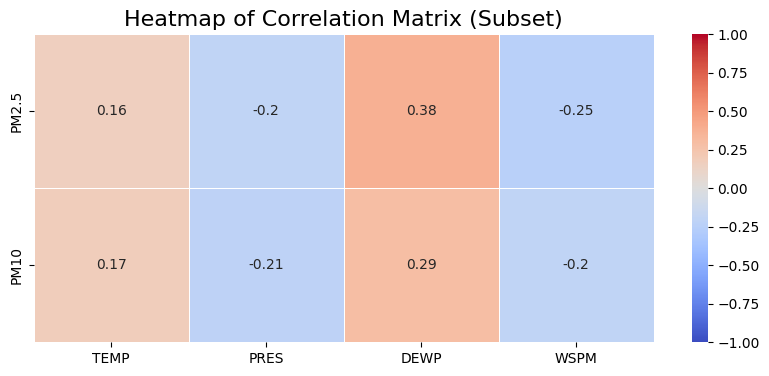

In [94]:
# Mengambil subset dari matriks korelasi sehingga tidak semua diambil
subset_correlation_matrix = correlation_matrix.loc[['PM2.5', 'PM10'], ['TEMP', 'PRES', 'DEWP', 'WSPM']]

# Membuat heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap of Correlation Matrix (Subset)', fontsize=16)
plt.show()


Visualiasi di atas merupakan visualiasi untuk korelasi atribut polusi dan kondisi cuaca. Semakin merah artinya korelasinya semakin positif sedangkan biru artinya korelasinya semakin negatif. Untuk mempermudah pemahaman, saya hanya menampilkan korelasi antara polusi dan atribut kondisi cuaca, sehingga pada visualisasi di atas hanya ada tabel dengan ukuran 2x4.

### Pertanyaan 2:

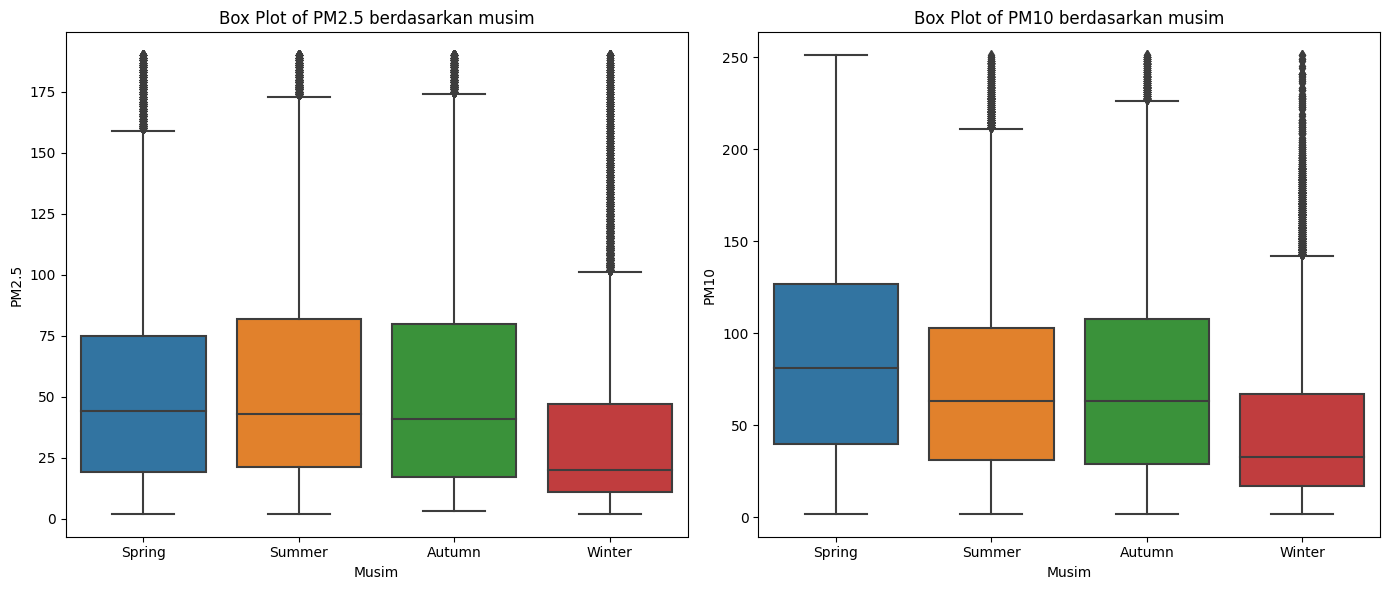

In [100]:
# Membuat Box Plot untuk PM2.5 dan PM10 berdasarkan musim
plt.figure(figsize=(14, 6))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Season', y='PM2.5', data=main_data_df)
plt.title('Box Plot of PM2.5 berdasarkan musim')
plt.ylabel('PM2.5')
plt.xlabel('Musim')

# Box Plot untuk PM10
plt.subplot(1, 2, 2)
sns.boxplot(x='Season', y='PM10', data=main_data_df)
plt.title('Box Plot of PM10 berdasarkan musim')
plt.ylabel('PM10')
plt.xlabel('Musim')

plt.tight_layout()
plt.show()

Gambar di atas merupakan visualisasi Box plot untuk setiap atribut polusi berdasarkan musim. Bot plot mempermudah pembaca untuk membandingkan rata-rata, nilai minimum, dan nilai maksimum.

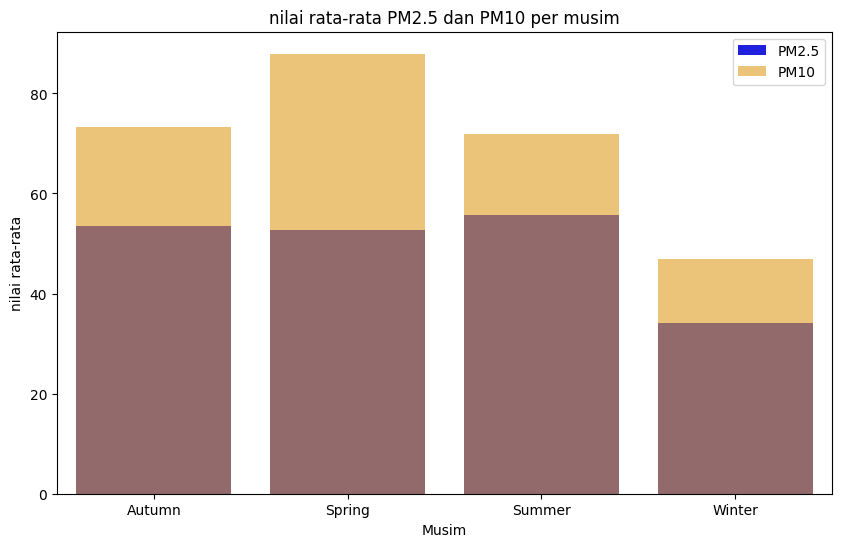

In [101]:
# Menghitung rata-rata PM2.5 dan PM10 per musim
seasonal_means = main_data_df.groupby('Season')[['PM2.5', 'PM10']].mean().reset_index()

# Membuat Bar Plot untuk rata-rata PM2.5 dan PM10 per musim
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='PM2.5', data=seasonal_means, color='blue', label='PM2.5')
sns.barplot(x='Season', y='PM10', data=seasonal_means, color='orange', label='PM10', alpha=0.6)

plt.title('nilai rata-rata PM2.5 dan PM10 per musim')
plt.ylabel('nilai rata-rata')
plt.xlabel('Musim')
plt.legend()
plt.show()

Selanjutnya terdapat pula barplot yang secara intuitif lebih mudah lagi dibandingkan dari pada boxplot. Namun informasi yang disajikan tidak sebanyak pada box plot, namun cocok untuk memberikan informasi utama yaitu tetang nilai rata-rata. 

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

Analisis lanjutan akan dilakukan ANOVA test untuk mendukung analisis pertanyaan kedua. ANOVA test dapat digunakan untuk menguji perbedaan rata-rata dari beberapa kelompok(dalam kasus ini musim). Berikut adalah ANOVA test yang dilakukan.

In [104]:
## ANOVA test untuk PM2.5

winter_pm25 = main_data_df[main_data_df['Season'] == 'Winter']['PM2.5'].dropna()
spring_pm25 = main_data_df[main_data_df['Season'] == 'Spring']['PM2.5'].dropna()
summer_pm25 = main_data_df[main_data_df['Season'] == 'Summer']['PM2.5'].dropna()
autumn_pm25 = main_data_df[main_data_df['Season'] == 'Autumn']['PM2.5'].dropna()

f_value, p_value = stats.f_oneway(winter_pm25, spring_pm25, summer_pm25, autumn_pm25)
print("Hasil ANOVA test untuk PM2.5")
print(f"F-value: {f_value}")
print(f"P-value: {p_value}\n")

## ANOVA test untuk PM10

winter_pm10 = main_data_df[main_data_df['Season'] == 'Winter']['PM10'].dropna()
spring_pm10 = main_data_df[main_data_df['Season'] == 'Spring']['PM10'].dropna()
summer_pm10 = main_data_df[main_data_df['Season'] == 'Summer']['PM10'].dropna()
autumn_pm10 = main_data_df[main_data_df['Season'] == 'Autumn']['PM10'].dropna()

f_value, p_value = stats.f_oneway(winter_pm10, spring_pm10, summer_pm10, autumn_pm10)
print("Hasil ANOVA test untuk PM10")
print(f"F-value: {f_value}")
print(f"P-value: {p_value}")

Hasil ANOVA test untuk PM2.5
F-value: 2873.1206765364423
P-value: 0.0

Hasil ANOVA test untuk PM10
F-value: 5727.632655236123
P-value: 0.0


Nilai F-value yang tinggi untuk kedua PM2.5 dan PM10 menunjukkan bahwa nilai rata-rata antar musim cukup berbeda. Sedangkan P-value bernilai 0 artinya kita menolak hipotesis 0, yang artinya perbedaan yang dihasilkan untuk kedua P2.5 dan PM10 singnifikan dan bukan kebetulan.

## Conclusion

- Conclusion pertanyaan 1

Hubungan antara tingkat polusi dan kondisi cuaca tertanya paling besar dipengaruhi oleh titik embun, yaitu sekitar 0,37 untuk PM2.5 dan 0,29 untuk PM10. Angka tersebut bukan nilai korelasi yang cukup tinggi namun tidak bisa diabaikan pula untuk dicarikan korelasinya. Selanjutnya, pengaruh polusi dipengaruhi oleh kecepatan angin, tekananm dan suhu.



- Conclusion pertanyaan 2

Perubahan kualitas udara pada tiap musimnya ternyata paling terlihat di musim winter. Winter memiliki perbedaan nilai yang signifikan dibanding dengan 3 musim lainnya. Selain itu, ANOVA test yang telah dilakukan juga menyatakan bahwa perbedaan PM2.5 dan PM10 yang terdapat antar musim cukup signifikan dan bukan karena kebetulan.